In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r'train.csv', )

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
x = df[['Age', 'Fare', 'Pclass']]
y = df [['Survived']]

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
si = SimpleImputer()

In [37]:
x['Age'] = si.fit_transform(x[['Age']])

C:\Users\saqli\AppData\Local\Temp\ipykernel_18048\1225173066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = si.fit_transform(x[['Age']])


In [38]:
x

,Age,Fare,Pclass
0,22.000000,7.2500,3
1,38.000000,71.2833,1
2,26.000000,7.9250,3
3,35.000000,53.1000,1
4,35.000000,8.0500,3
...,...,...,...
886,27.000000,13.0000,2
887,19.000000,30.0000,1
888,29.699118,23.4500,3
889,26.000000,30.0000,1


In [14]:
from sklearn.preprocessing import KBinsDiscretizer

In [40]:
kbd = KBinsDiscretizer(n_bins = 5, strategy= 'quantile', encode = 'ordinal')

In [41]:
age_binned = kbd.fit_transform(x[['Age']])

In [43]:
age_binned = pd.DataFrame(age_binned)

In [44]:
age_binned.head()

,0
0,1.0
1,4.0
2,1.0
3,3.0
4,3.0


In [53]:
from scipy import stats


In [56]:
print(kbd.bin_edges_)

[array([ 0.42      , 20.        , 28.        , 29.69911765, 38.        ,
        80.        ])                                                   ]


<Axes: ylabel='Count'>

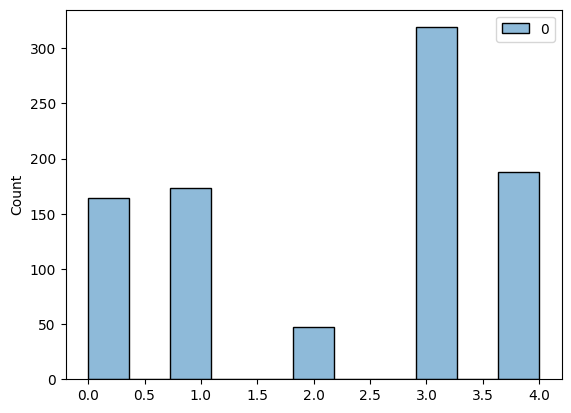

In [55]:
sns.histplot(age_binned)

C:\Users\saqli\AppData\Local\Temp\ipykernel_18048\1539877588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Age'])


<Axes: xlabel='Age', ylabel='Density'>

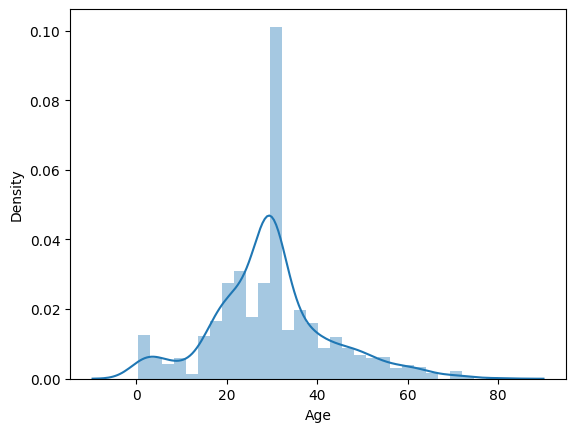

In [47]:
sns.distplot(x['Age'])

In [77]:
kbins = KBinsDiscretizer(n_bins = 10, strategy = 'kmeans', encode = 'onehot')

In [78]:
Kbins = kbins.fit_transform(x[['Age']])

In [80]:
Kbins = Kbins.toarray()

In [73]:
print(kbins.bin_edges_)

[array([ 0.42      ,  8.80038136, 17.89282816, 25.47171197, 32.82245481,
        40.32068966, 48.17222222, 56.11805556, 64.22916667, 72.58333333,
        80.        ])                                                   ]


<Axes: ylabel='Count'>

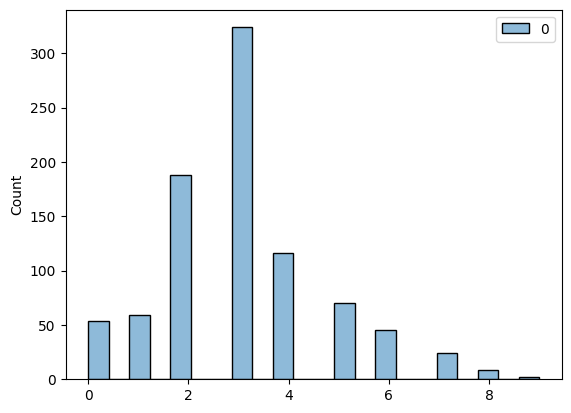

In [75]:
sns.histplot(Kbins)

In [83]:
Kbins

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(891, 10))